# Churn Prediction in Telecom Industry

Churn has to do with  how frequently users of a product or service stop using it after a certain amount of time has passed. The Customer churn, sometimes referred to as customer turnover, is an important sign of a company's ability to keep clients, and it's crucial in sectors like telecoms, subscription services, and retail where customer connections are continuous.


Solution:
This project tries to predict churn in the telecom industry starting with the features that fundamentally contribute to the churn rate such as, demographics (gender,senior citizens),internet usage (streaming TV,streaming movies,internet service), billing information (monthly bill, paperless billing, total charges),tech support
Using previously availble data and model,we obtain meaningful information concerning the churn rate.

In the solution below, i made use of LightGBM and XBOOST, as well as LogisticRegression as models with XBOOST having the highest accuracy
The reason for that many models is simply to compare accuracy results and get the best possible predictions.
The step are as follows:

Step 1:Data collection
We need to obtain historical data on customers such as tech support, home data usage(streaming TV, streaming movies, internet service),billing details(monthly payment, total payment), demoraphics(age,senior citizen),contract duration(one year, month to month).

Step 2:Data preprocessing
next we preprocess the data properly in terms of missing values, dealing with categorical data, dummy variables.

Step 3:Feature Engineering
Here we identify the best features for the prediction using algorithms such as 
Mutual Information-based Selection: Mutual information measures the dependency between variables and can be used for feature selection.
Feature Importance-based Selection: This involves using an ensemble model (like a Random Forest) to determine feature importance and selecting the most important features
Correlation-based Feature Selection: This technique involves selecting features that have a high correlation with the target variable ("Churn" in this case)
Recursive Feature Addition (RFE): RFE works by recursively removing the least important features based on a model (e.g., a classifier) and selecting the most important features
Acculmulated selected features from these algorithms:
StreamingTV,TechSupport,Partner,PaymentMethod,SeniorCitizen,DeviceProtection,StreamingMovies,OnlineBackup,TotalCharges,Dependents.

Step 4:Model training:
I made use of LightGBM and XGBOOST, as well as LogisticRegression as models with XBOOST having the highest accuracy
The reason for that many models is simply to compare accuracy results and get the best possible predictions as they are all powerfull tools that can handle complex data.

Step 5:Model Training:
Here we split the data set to prevent overfitting the model using train test split. This helps the model to have high accuracy in real life predictions.

Step 6:Model Evaluation:
After obtaining information from the model we can now draw assumptions based on accuracy score and prediction scores and others.
The company can use the model to predict real life data and obtain information about customer churn in the future.

RESULTS FROM THE CODE BELOW:
More of the customers did not churn at this company with non churn customers being 5174 and churn customers as 1869 of the values. Sprint will be able to use this information for future predictions and target the proper age demographics(age, senior citizen), and improve customer service with information from tech support as well as better service quality in terms of billing. This offers better general communication and relationship with clients.

Model accuracy from XGBOOST:
ROC-AUC Score: 0.7231138706654171
Precision Score: 0.6652173913043479
Recall Score: 0.5454545454545454
F1 Score: 0.5994123408423115
F2 score of XGBoost Classifier: 0.8064363464268812.
Accuracy Score: 0.8064363464268812.

Model Accuracy from LightGBM:
ROC-AUC Score: 0.7185070841832516
Precision Score: 0.6544276457883369
Recall Score: 0.5401069518716578
F1 Score: 0.591796875
F2 score of LGBM Classifier: 0.8021769995267393.
Accuracy Score: 0.8021769995267393



Also from the results we can gather information about male being more than females and most common modes of payment where it was electronic mode so the company can improve its online user operations for the ease of the customers. 
In the churn and contract contrast, people with month to month contract being the most common also had the highest churn rate and information about the age demographics for targeted marketing towards younger people as they are more in comparism to the senior citizens. 



## Importing libraries and packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='white')

import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, fbeta_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import category_encoders as ce
import optuna
from optuna.integration import LightGBMPruningCallback

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

## Loading the dataset

In [7]:

url = "/kaggle/input/churn-datab/WA_Fn-UseC_-Telco-Customer-Churn.csv" 
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA

In [9]:
df.shape

(7043, 21)

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The TotalCharges column is an object type which is not supposed to be. I'll be converting it to a numeric type.

In [12]:
df.TotalCharges = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Summary of the non-null columns in the dataset

In [14]:
null = df.isnull().sum().sort_values(ascending=False)
n1 = df.isnull().sum()/df.isnull().count()*100
n2 = (np.round(n1, 1)).sort_values(ascending=False)
missing_val = pd.concat([null, n2], axis=1, keys=['Total null', 'Percent(%)'])
missing_val

,Total null,Percent(%)
TotalCharges,11,0.2
customerID,0,0.0
DeviceProtection,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


#### A quick viz of the dataset's categorical columns

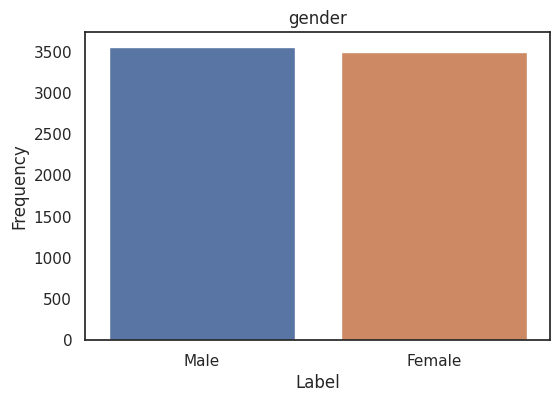

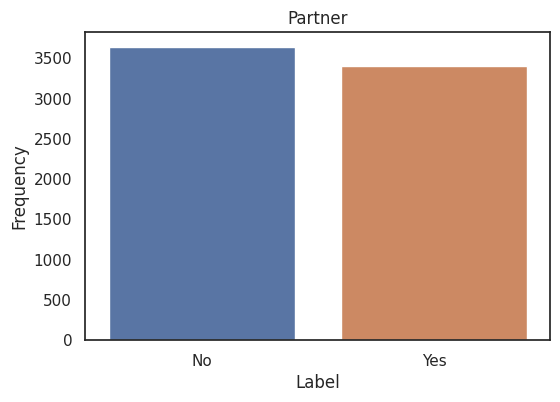

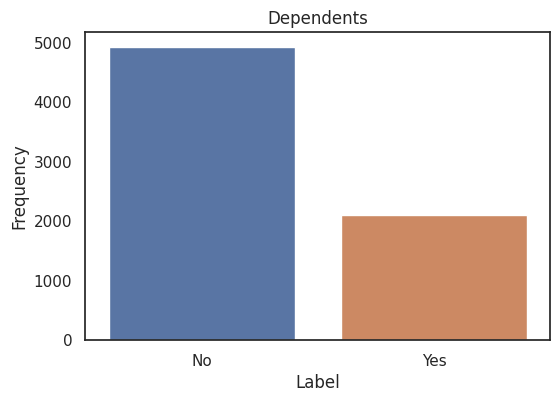

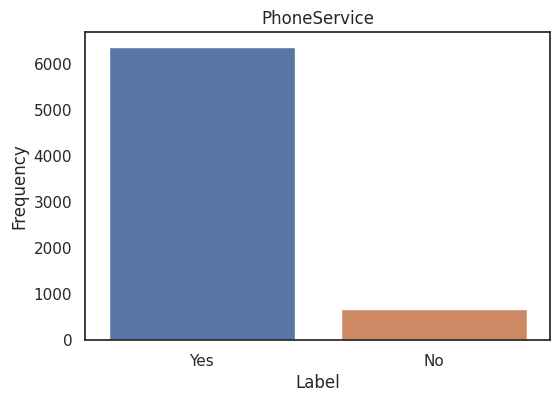

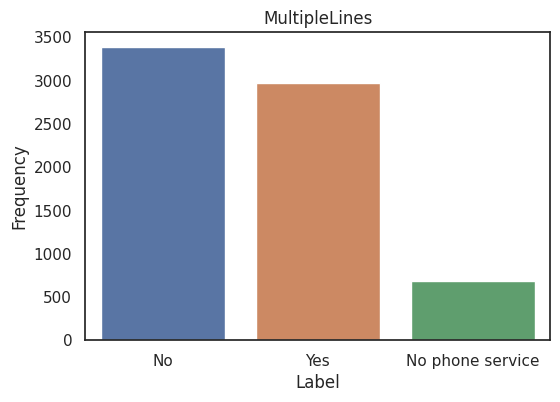

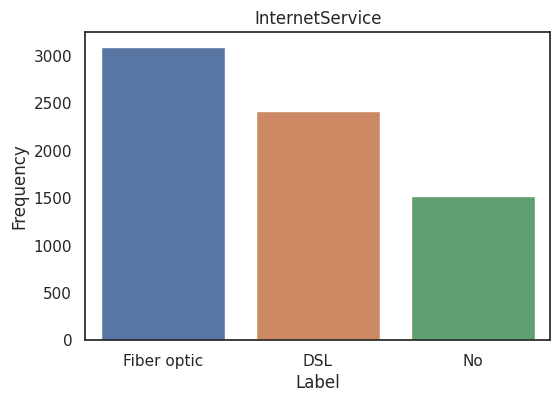

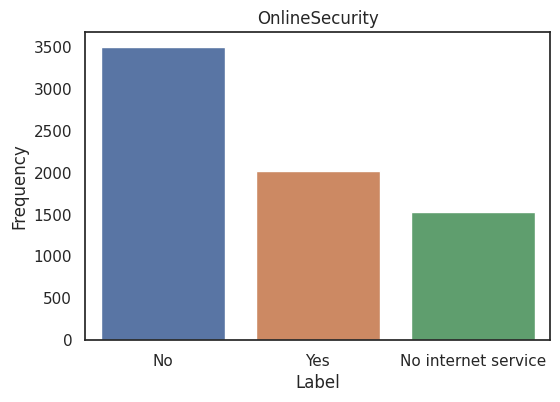

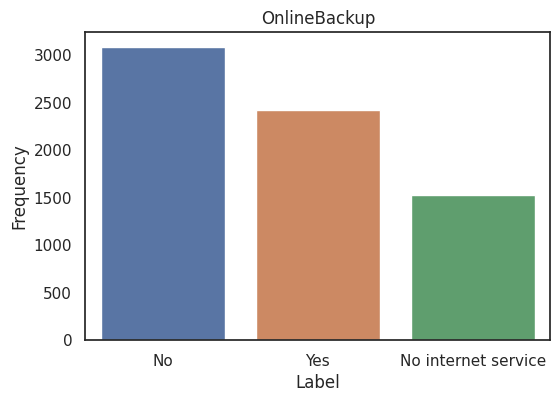

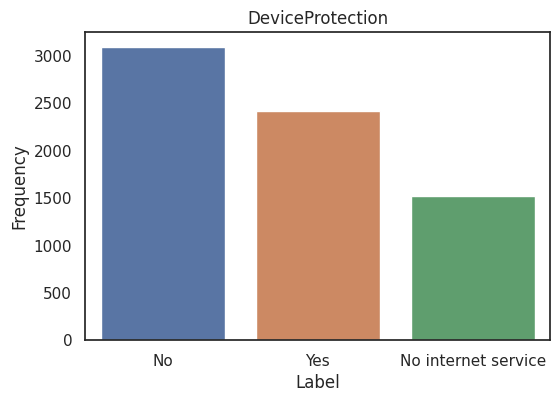

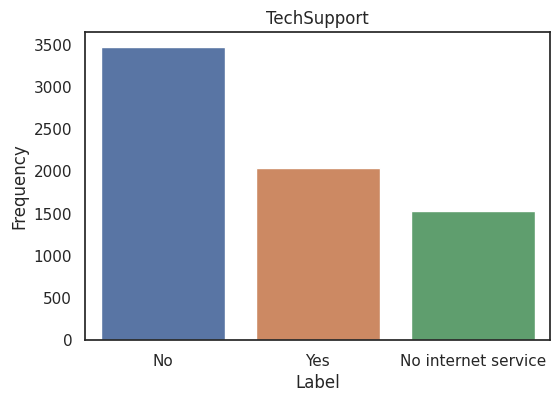

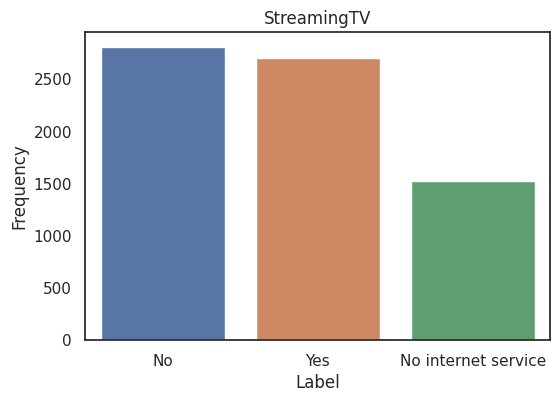

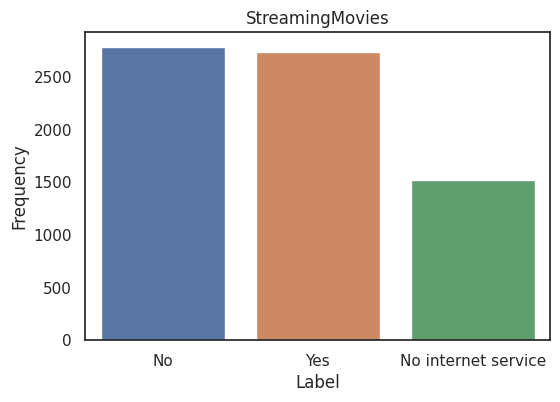

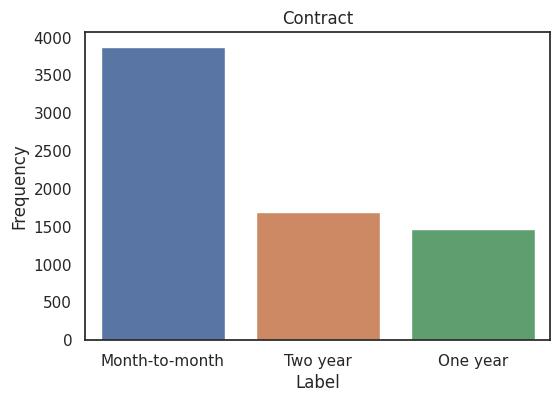

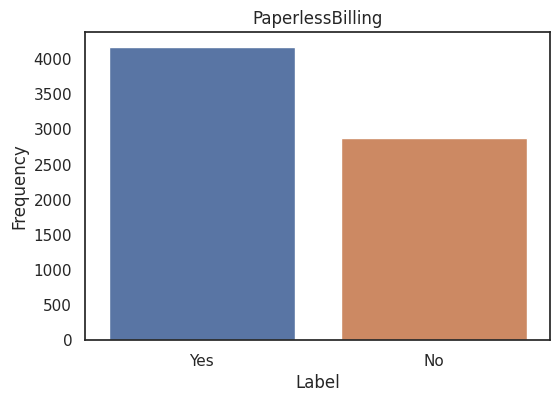

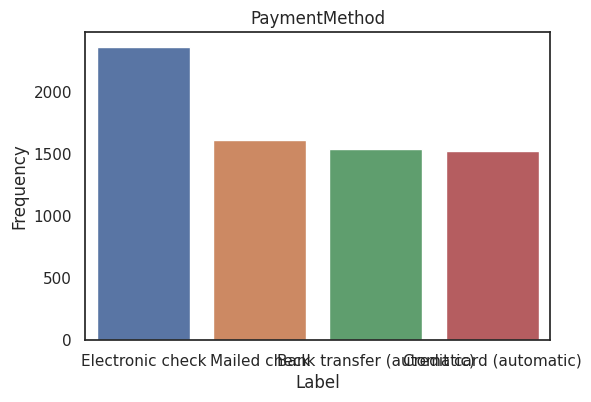

In [16]:
review = df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]
for i in review.columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=review[i].value_counts().index, y=review[i].value_counts()).set(title=i, xlabel='Label', ylabel='Frequency')
    plt.show()

## Further Analysis

### Churn

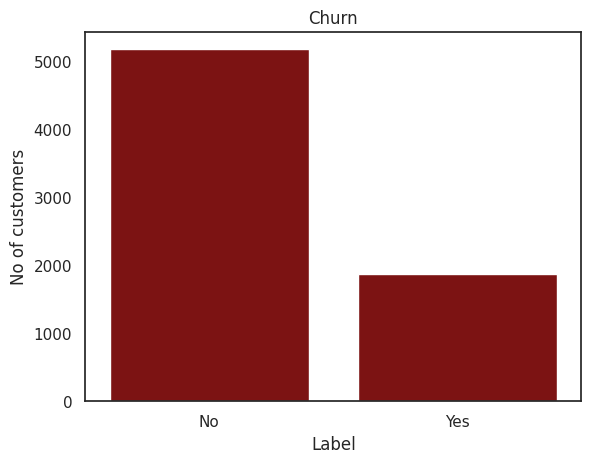

In [17]:
colors = ['#8e0201', '#e8cccc']
sns.countplot(x=df['Churn'], color=colors[0])
plt.title('Churn')
plt.xlabel('Label')
plt.ylabel('No of customers')
plt.show();

In [18]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Majority of customers stayed or did not churn

#### Churn based on Gender

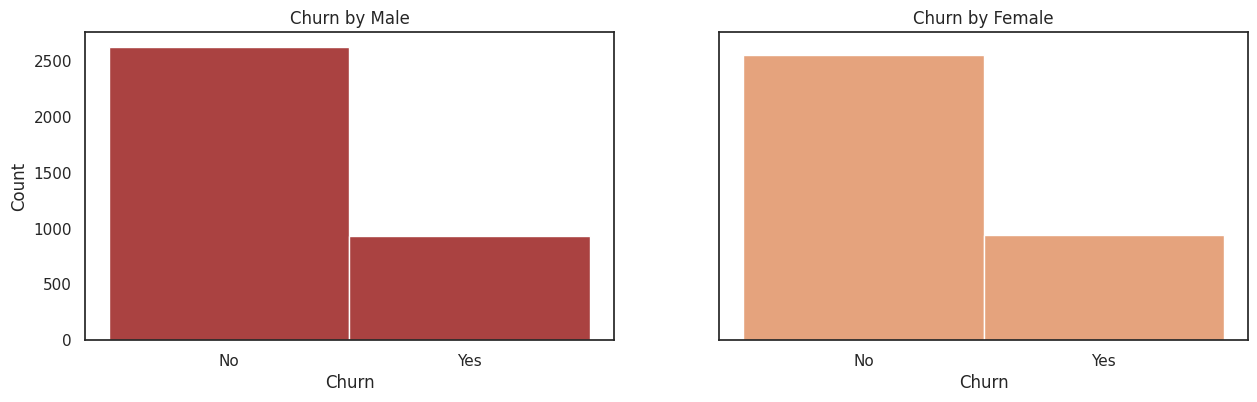

In [19]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(15,4))

ax = sns.histplot(df[df['gender']=='Male']['Churn'], kde=False, color='#8e0201', ax=ax1)
ax.set_title('Churn by Male')
ax = sns.histplot(df[df['gender']=='Female']['Churn'], kde=False, color=sns.color_palette()[1], ax=ax2)
ax.set_title('Churn by Female');

### Gender

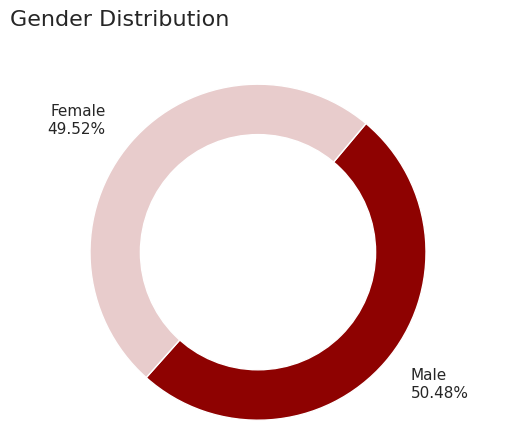

In [20]:
counts = df['gender'].value_counts()
fig, ax = plt.subplots()
colors = ['#8e0201', '#e8cccc']
label = ['Male\n50.48%', 'Female\n49.52%']
ax.pie(counts, labels=label, colors=colors, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Gender Distribution', fontsize = 16, loc='left', pad=30)
ax.axis('equal')
plt.show();

From the above, the majority of the customers is seen to be Male. 

### Partner

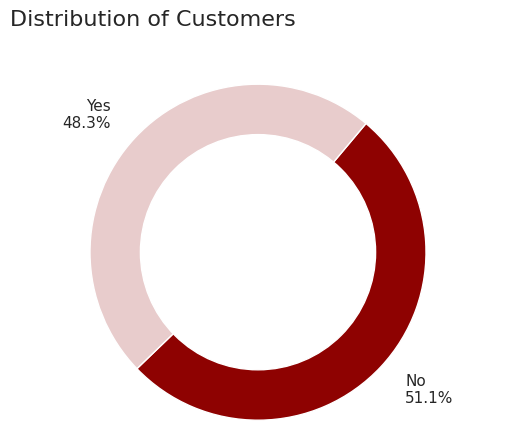

In [21]:
counts = df['Partner'].value_counts()
fig, ax = plt.subplots()
colors = ['#8e0201', '#e8cccc']
label = ['No\n51.1%', 'Yes\n48.3%']
ax.pie(counts, labels=label, colors=colors, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Customers', fontsize = 16, loc='left', pad=30)
ax.axis('equal')
plt.show();

Majority of the customers have no partners. (51.1%)

### Senior Citizen

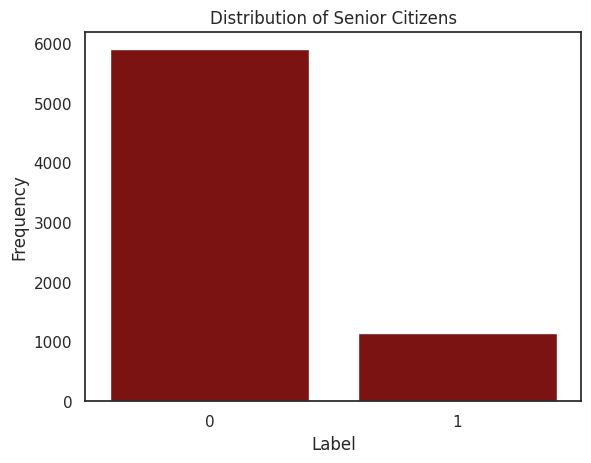

In [22]:
colors = ['#8e0201', '#e8cccc']
sns.countplot(data=df, x='SeniorCitizen', color=colors[0]).set(title='Distribution of Senior Citizens', xlabel='Label', ylabel='Frequency')
plt.show();

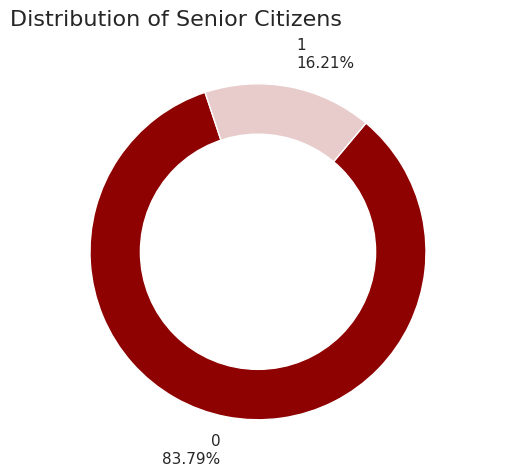

In [23]:
counts = df['SeniorCitizen'].value_counts()
fig, ax = plt.subplots()
colors = ['#8e0201', '#e8cccc']
label = ['0\n83.79%', '1\n16.21%']
ax.pie(counts, labels=label, colors=colors, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Senior Citizens', fontsize = 16, loc='left', pad=30)
ax.axis('equal')
plt.show();

16.21% (1142) of the customers were younger citizens while 83.79% (5901) were Senior Citizens

### Dependents

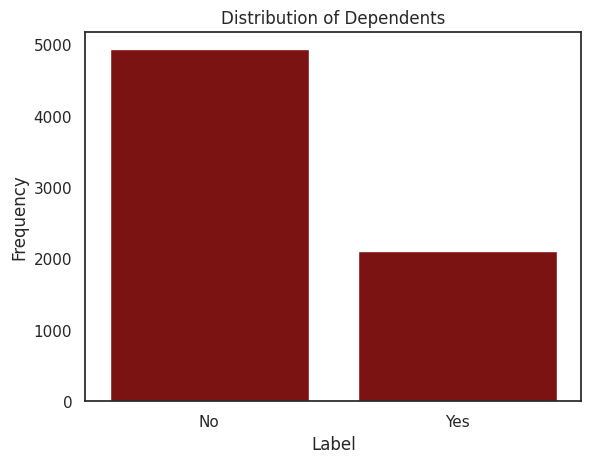

In [24]:
colors = ['#8e0201', '#e8cccc']
sns.countplot(data=df, x='Dependents', color=colors[0]).set(title='Distribution of Dependents', xlabel='Label', ylabel='Frequency')
plt.show();

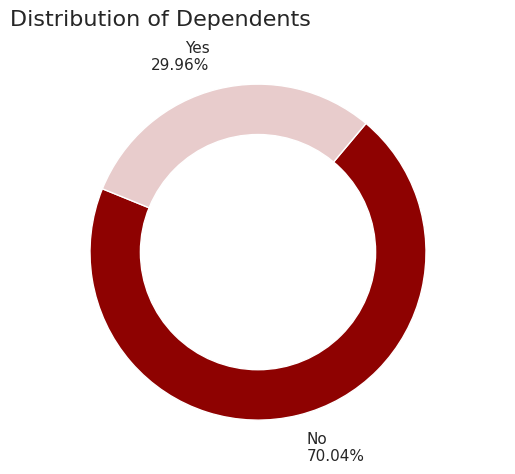

In [25]:
counts = df['Dependents'].value_counts()
fig, ax = plt.subplots()
colors = ['#8e0201', '#e8cccc']
label = ['No\n70.04%', 'Yes\n29.96%']
ax.pie(counts, labels=label, colors=colors, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Dependents', fontsize = 16, loc='left', pad=30)
ax.axis('equal')
plt.show();

Few of the customers actually have dependents

### Customer Services

In [26]:
def get_colors(num_wedges):
    if num_wedges == 2:
        return ['#8e0201', '#c93432']  # Two colors
    elif num_wedges == 3:
        return ['#8e0201', '#c93432', '#e8cccc']  # Three colors
    elif num_wedges == 4:
        return ['#8e0201', '#c93432', '#e8cccc', '#e8cccc']  # Four colors
    else:
        # Handle cases with more than four wedges (add more colors as needed)
        return ['#FFC107', '#2196F3', '#4CAF50', '#FF5722', '#9C27B0', '#00BCD4', '#FFEB3B', '#795548']

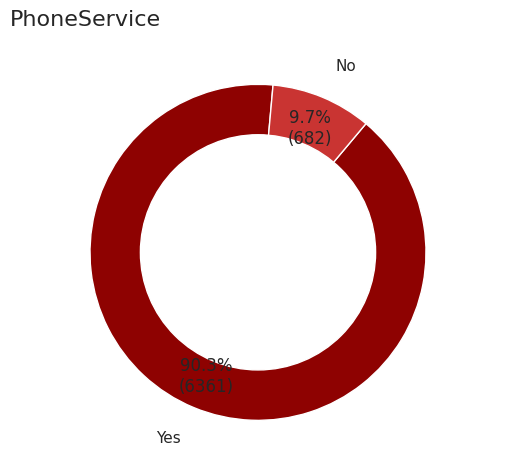

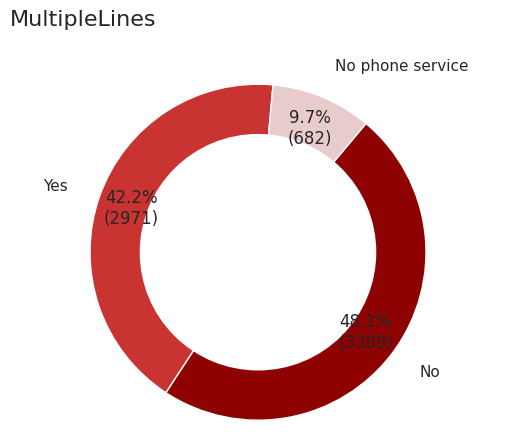

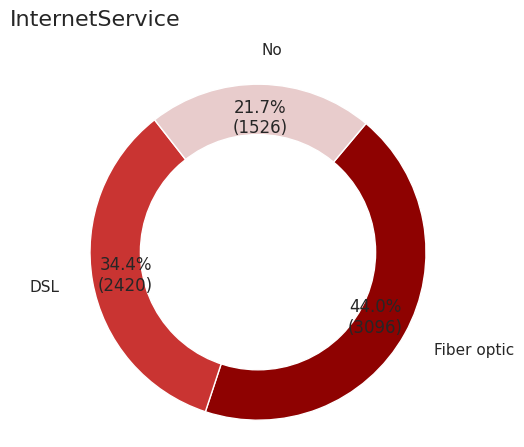

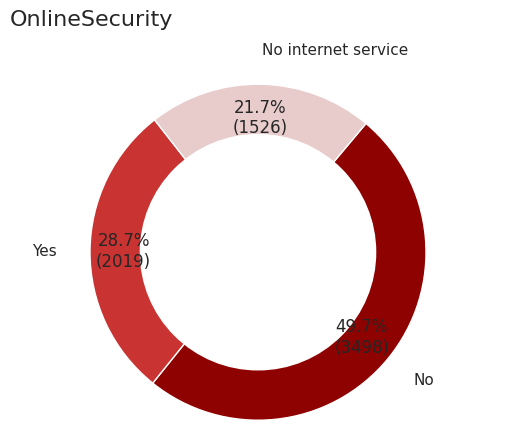

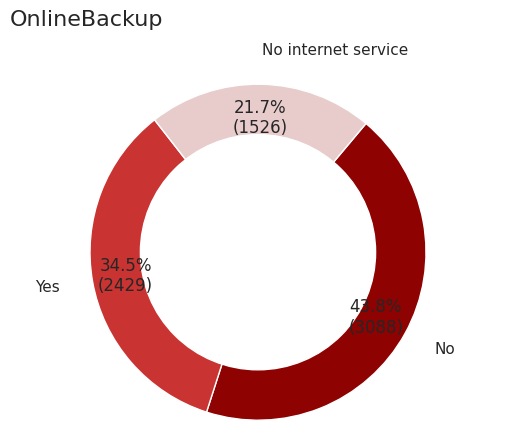

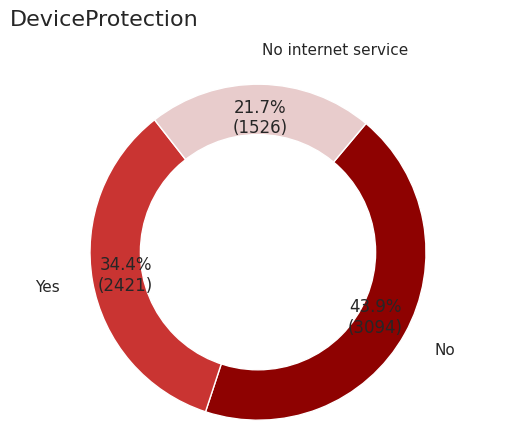

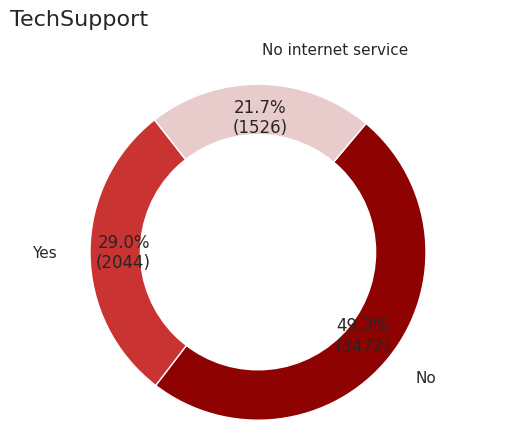

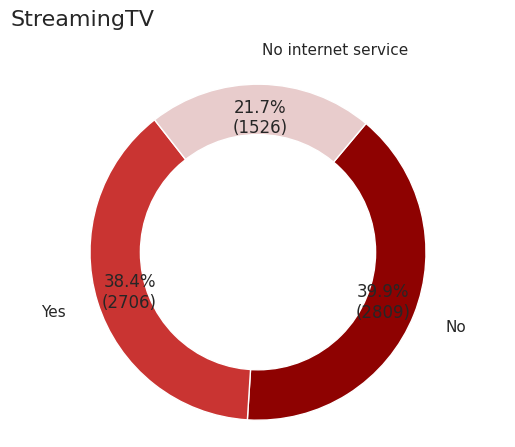

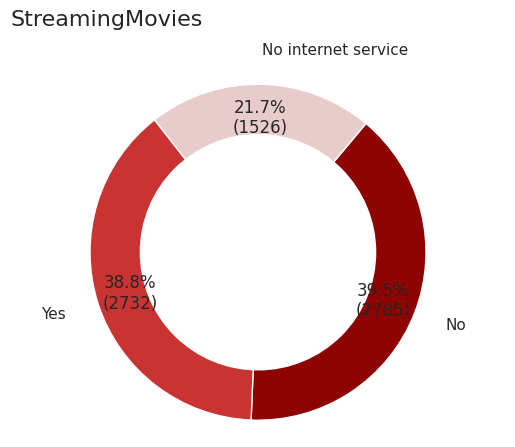

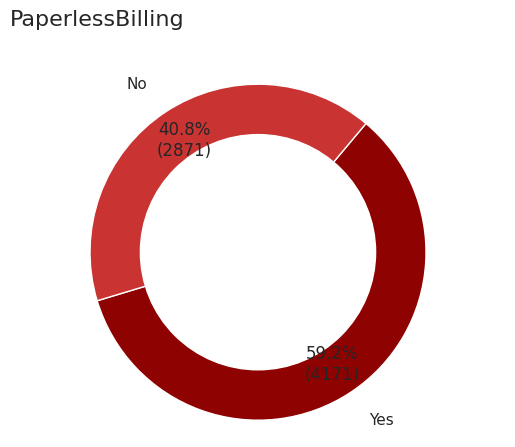

In [27]:
def func(pct, allvalues):
    abs = int(pct/100.*np.sum(allvalues))
    return '{:.1f}%\n({:d})'.format(pct, abs)

review = df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']]
for i in review.columns:
    fig, ax = plt.subplots()
    num_wedges = len(review[i].value_counts())
    colors = get_colors(num_wedges)
    ax.pie(x=review[i].value_counts(), labels=review[i].value_counts().index, colors=colors, startangle=50, counterclock=False, 
           pctdistance=0.8, labeldistance=1.2, autopct=lambda pct: func(pct, review[i].value_counts().values))
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)
    ax.set_title(i, fontsize = 16, loc='left', pad=30)
    ax.axis('equal')
    plt.show()

### Contract

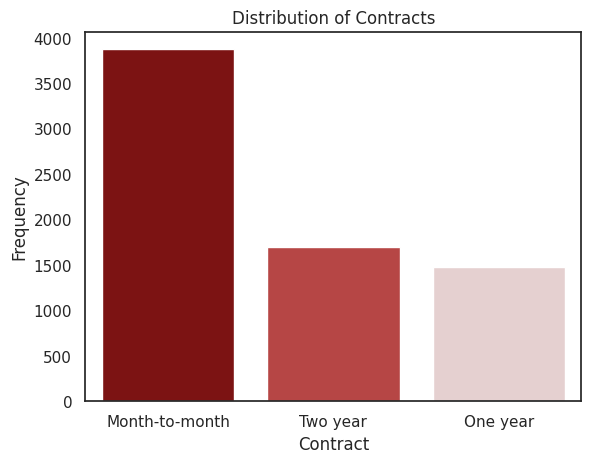

In [28]:
colors = ['#8e0201', '#c93432', '#e8cccc']
palette = sns.set_palette(sns.color_palette(colors))
order = df.Contract.value_counts().index
sns.countplot(data=df, x='Contract', order=order, palette=palette).set(title='Distribution of Contracts',
                                                                        xlabel='Contract', ylabel='Frequency')
plt.show();

The `Month-to-month` is the contractual situation of most customers

#### Contract based on Tenure

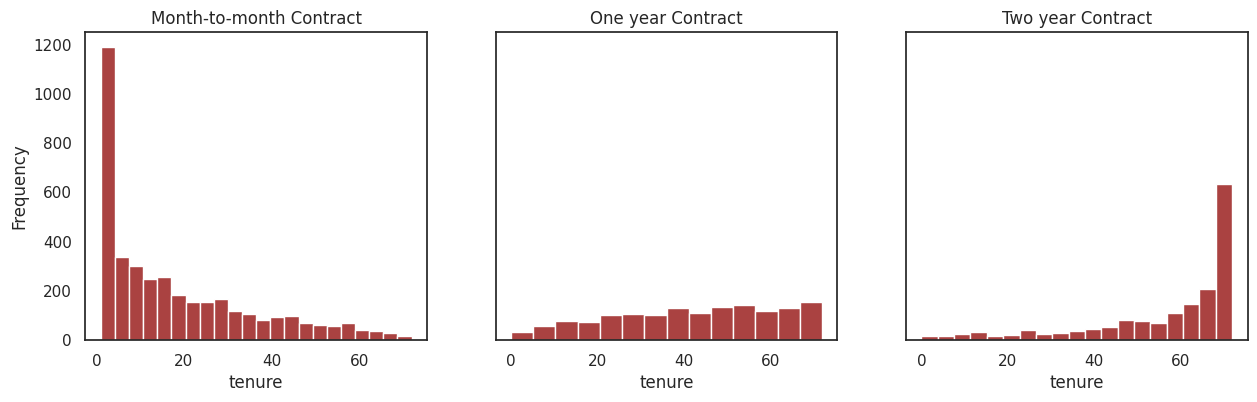

In [29]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize=(15,4))

ax = sns.histplot(df[df['Contract']=='Month-to-month']['tenure'], kde=False, color = '#8e0201', ax=ax1)
ax.set_ylabel('Frequency')
ax.set_title('Month-to-month Contract')
ax = sns.histplot(df[df['Contract']=='One year']['tenure'], kde=False, color = '#8e0201', ax=ax2)
ax.set_ylabel('Frequency')
ax.set_title('One year Contract')
ax = sns.histplot(df[df['Contract']=='Two year']['tenure'], kde=False, color = '#8e0201', ax=ax3)
ax.set_ylabel('Frequency')
ax.set_title('Two year Contract')
plt.show();

#### Contract based on Churn

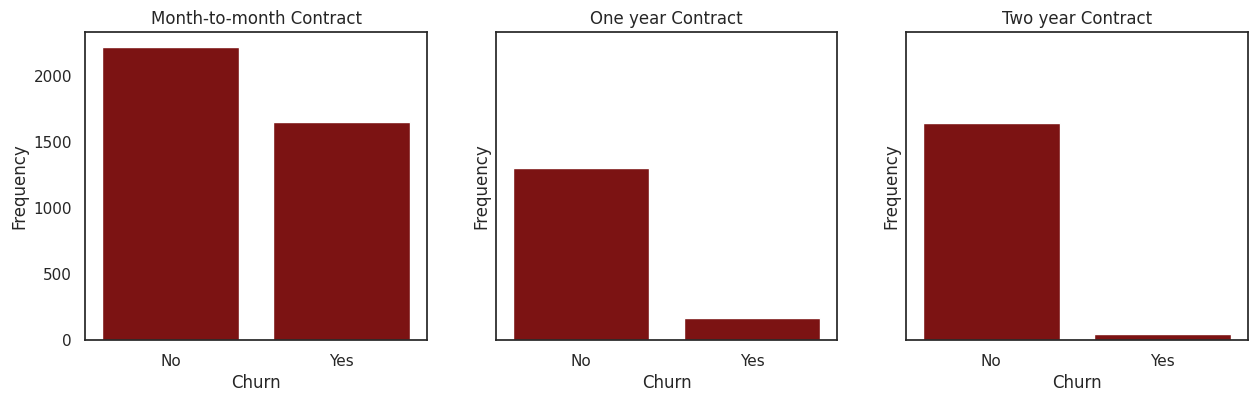

In [30]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize=(15,4))

ax = sns.countplot(x=df[df['Contract']=='Month-to-month']['Churn'], color='#8e0201', ax=ax1)
ax.set_ylabel('Frequency')
ax.set_title('Month-to-month Contract')
ax = sns.countplot(x=df[df['Contract']=='One year']['Churn'], color='#8e0201', ax=ax2)
ax.set_ylabel('Frequency')
ax.set_title('One year Contract')
ax = sns.countplot(x=df[df['Contract']=='Two year']['Churn'], color='#8e0201', ax=ax3)
ax.set_ylabel('Frequency')
ax.set_title('Two year Contract')
plt.show();

#### Contract based on Gender

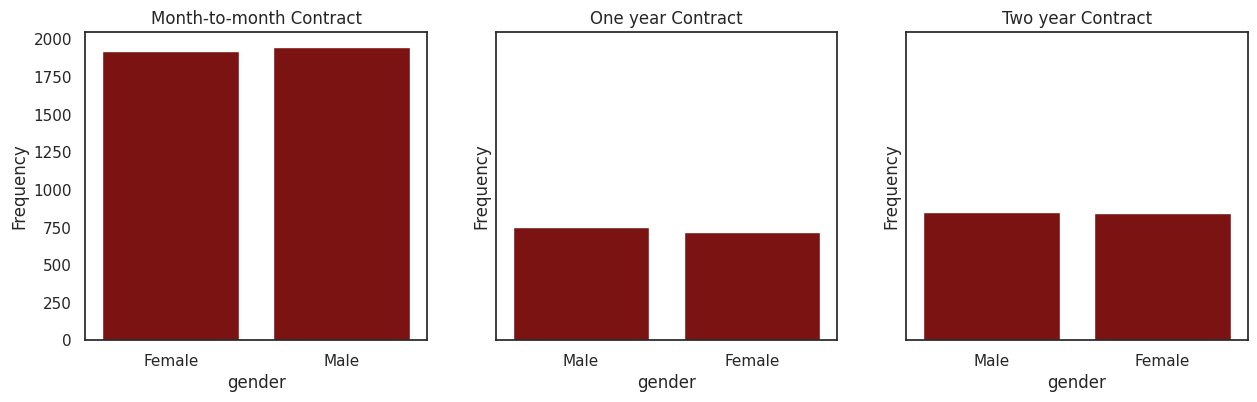

In [31]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize=(15,4))

ax = sns.countplot(x=df[df['Contract']=='Month-to-month']['gender'], color='#8e0201', ax=ax1)
ax.set_ylabel('Frequency')
ax.set_title('Month-to-month Contract')
ax = sns.countplot(x=df[df['Contract']=='One year']['gender'], color='#8e0201', ax=ax2)
ax.set_ylabel('Frequency')
ax.set_title('One year Contract')
ax = sns.countplot(x=df[df['Contract']=='Two year']['gender'], color='#8e0201', ax=ax3)
ax.set_ylabel('Frequency')
ax.set_title('Two year Contract')
plt.show();

### Charges

The charges consists of the Monthly Charges and the Total Charges

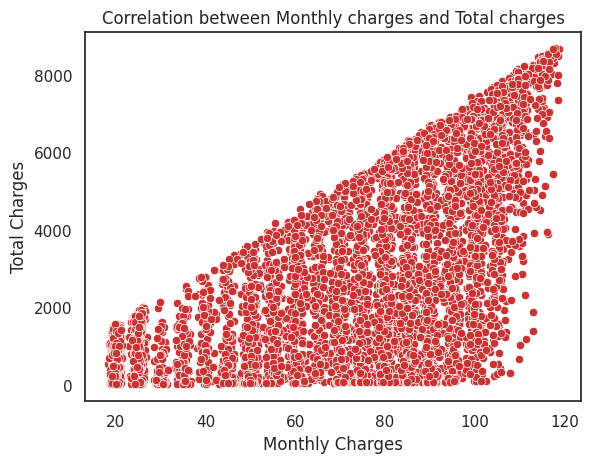

In [32]:
sns.scatterplot(x=df['MonthlyCharges'], y=df['TotalCharges'], color='#c93432')
plt.title('Correlation between Monthly charges and Total charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show();

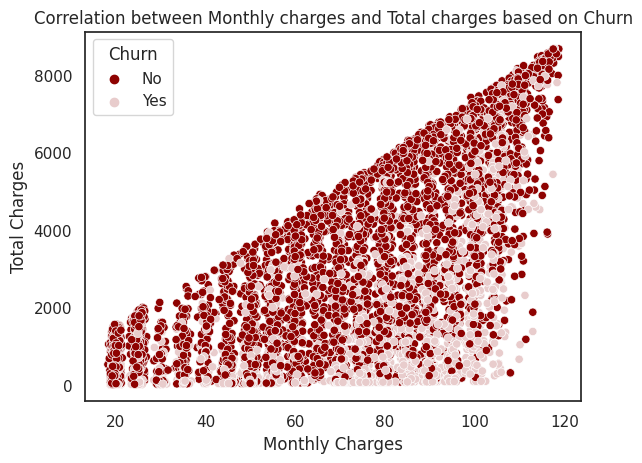

In [33]:
colors = ['#8e0201', '#e8cccc']
palette = sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette=palette)
plt.title('Correlation between Monthly charges and Total charges based on Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show();

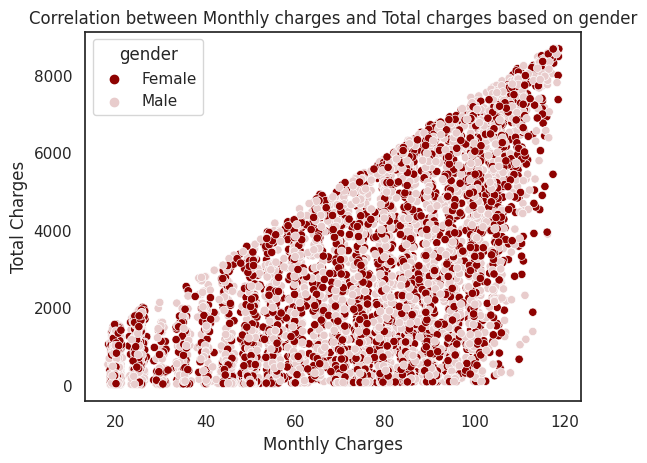

In [34]:
colors = ['#8e0201', '#e8cccc']
palette = sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='gender', palette=palette)
plt.title('Correlation between Monthly charges and Total charges based on gender')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show();

### Payment Methods

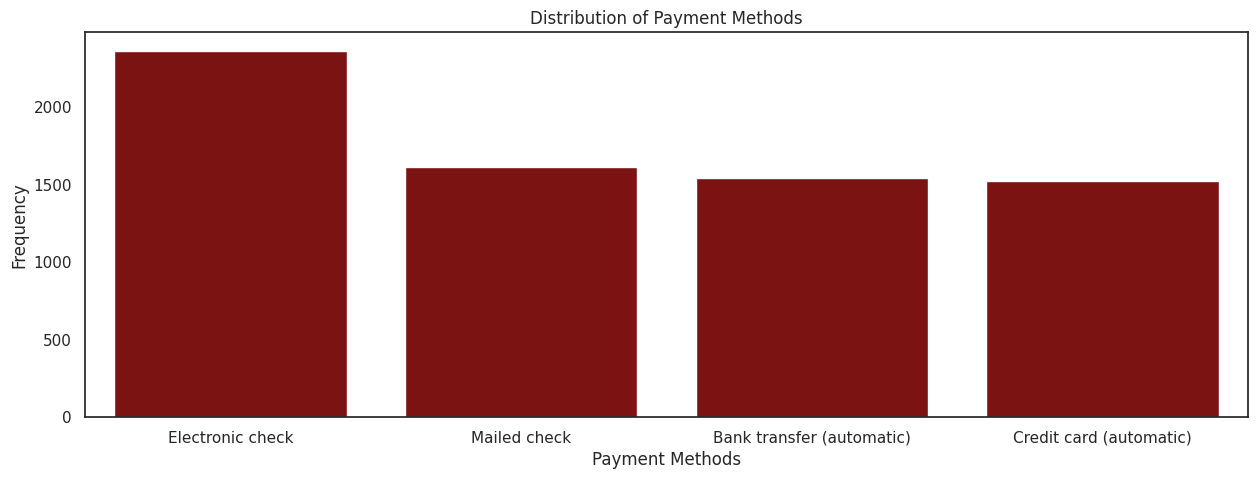

In [35]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='PaymentMethod', color='#8e0201')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Methods')
plt.ylabel('Frequency')
plt.show();

The `electronic check` is the most common method of payment

In [36]:
print('The categorical features are:\n {}'.format(df.select_dtypes(exclude='number').columns.tolist()))
print('The numerical features are:\n {}'.format(df.select_dtypes(include='number').columns.tolist()))

The categorical features are:
 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
The numerical features are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [37]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Model Training

In [38]:
# get input and output data
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

In [39]:
warnings.filterwarnings('ignore')

# Converting categorical variables to numeric data
cat_pipeline = Pipeline(
    steps=[('impute', SimpleImputer(strategy='most_frequent')),
        ('target encoding', ce.TargetEncoder())
    ]
)

# Scaling numerical features and filling missing values
num_pipeline = Pipeline(
    steps=[('impute', SimpleImputer(strategy='mean')),
          ('scale', StandardScaler())]
)

# Numerical and categorical feature names
cat_cols = X.select_dtypes(exclude='number').columns
num_cols = X.select_dtypes(include='number').columns
print('Categorical columns:\n', cat_cols);print()
print('Numeric columns:\n',num_cols)

# Combining the two pipelines with a column transformer
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer(
    transformers=[
        ('numeric', num_pipeline, num_cols),
        ('categorical', cat_pipeline, cat_cols)
    ]
)

# encode the target label
le = LabelEncoder()
y = le.fit_transform(y)

# get mapping for each label
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('\n', le_name_mapping)

# Fitting the pipeline
X_ = full_pipeline.fit_transform(X, y)

# Create DataFrames with correct column names
X_df = pd.DataFrame(X_, columns=X.columns)
y_df = y

Categorical columns:
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

Numeric columns:
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

 {'No': 0, 'Yes': 1}


### Feature Selection

**Recursive Feature Addition (RFE): RFE works by recursively removing the least important features based on a model (e.g., a classifier) and selecting the most important features.**

In [40]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier()

# Initialize RFE
rfe = RFE(model, n_features_to_select=5)
# Fit RFE
fit = rfe.fit(X_df, y_df)

# Get the indices of the selected features
selected_indices = rfe.get_support(indices=True)
# Get the names of the selected features
list1_selected_features = X_df.columns[selected_indices]
list1_selected_features

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PaymentMethod',
       'TotalCharges'],
      dtype='object')

**Correlation-based Feature Selection: This technique involves selecting features that have a high correlation with the target variable ("Churn" in this case).**

In [41]:
from sklearn.feature_selection import f_regression

# Select the best k features using f_regression scores
k = 5
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X_df, y_df)
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
# Get the names of the selected features
list2_selected_features = X_df.columns[selected_indices]
list2_selected_features

Index(['SeniorCitizen', 'OnlineBackup', 'DeviceProtection', 'StreamingMovies',
       'PaymentMethod'],
      dtype='object')

**Feature Importance-based Selection: This involves using an ensemble model (like a Random Forest) to determine feature importance and selecting the most important features.**

In [42]:
# Train a random forest classifier to get feature importances
model = RandomForestClassifier()
model.fit(X_df, y_df)
# Get the feature importances
importances = model.feature_importances_
# Sort the features by importance score
indices = importances.argsort()[::-1]
# Select the top k features based on their importance scores
k = 5
selected_indices = indices[:k]
# Get the names of the selected features
list3_selected_features = X_df.columns[selected_indices]
list3_selected_features

Index(['Dependents', 'Partner', 'SeniorCitizen', 'PaymentMethod',
       'TotalCharges'],
      dtype='object')

**Mutual Information-based Selection: Mutual information measures the dependency between variables and can be used for feature selection.**

In [43]:
from sklearn.feature_selection import mutual_info_regression
# Select the best k features using mutual information scores

k = 10
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_selected = selector.fit_transform(X_df, y_df)
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
# Get the names of the selected features
list4_selected_features = X_df.columns[selected_indices]
list4_selected_features

Index(['SeniorCitizen', 'Partner', 'Dependents', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaymentMethod', 'TotalCharges'],
      dtype='object')

**Combining All Featured Columns.**

In [44]:
all_columns = []
all_columns.extend(list1_selected_features)
all_columns.extend(list2_selected_features)
all_columns.extend(list3_selected_features)
all_columns.extend(list4_selected_features)
selected_features = list(set(all_columns))
print(len(selected_features))

X_df = X_df[selected_features]
X_df.head()

10


,StreamingTV,TechSupport,Partner,PaymentMethod,SeniorCitizen,DeviceProtection,StreamingMovies,OnlineBackup,TotalCharges,Dependents
0,0.391276,0.215315,-1.160323,0.427097,-1.277445,0.417667,0.416355,0.189591,0.452854,-0.994971
1,0.225021,0.399288,-0.259629,0.112695,0.066327,0.146112,0.416355,0.189591,0.191067,-0.173876
2,0.391276,0.215315,-0.362660,0.427097,-1.236724,0.146112,0.416355,0.189591,0.191067,-0.960399
3,0.225021,0.399288,-0.746535,0.112695,0.514251,0.146112,0.151663,0.189591,0.167098,-0.195400
4,0.391276,0.399288,0.197365,0.427097,-1.236724,0.417667,0.416355,0.418928,0.452854,-0.941193


### Baseline Models

In [45]:
X_train, X_test, y_train, y_test= train_test_split(X_df, y_df, stratify=y_df, random_state=101, test_size=0.3)

In [46]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4930, 10) (4930,)
(2113, 10) (2113,)


In [47]:
# train a dummy classifier
dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
dummy_clf.fit(X_train, y_train)

# generate predictions
y_pred_dummy = dummy_clf.predict(X_test)

In [48]:
# Define final pipeline with preprocessing and logistic regression model
pipeline_log = Pipeline([
    # ('full_pipeline', full_pipeline),
    ('logistic_regression', LogisticRegression())
])

# Fit the data and generate predictions
pipeline_log.fit(X_train, y_train)
y_pred_log = pipeline_log.predict(X_test)

In [49]:
# derive the f2-scores for each baseline model
f2_score_dummy = fbeta_score(y_test, y_pred_dummy, average='micro', beta=2)
f2_score_log = fbeta_score(y_test, y_pred_log, average='micro', beta=2)

# print the f-2 score
print(f'F2 score of dummy classifier: {f2_score_dummy}')
print(f'F2 score of logistic regression classifier: {f2_score_log}')

F2 score of dummy classifier: 0.514907714150497
F2 score of logistic regression classifier: 0.7969711310932324


In [50]:
# accuracy score of baseline models
acc_score_dummy = accuracy_score(y_test, y_pred_dummy)
acc_score_log = accuracy_score(y_test, y_pred_log)

# print the f-2 score
print(f'Accuracy score of dummy classifier: {acc_score_dummy}')
print(f'Accuracy score of logistic regression classifier: {acc_score_log}')

Accuracy score of dummy classifier: 0.514907714150497
Accuracy score of logistic regression classifier: 0.7969711310932324


## LightGBM

In [54]:
def objective(trial):
    warnings.filterwarnings('ignore')

    # Define parameters to tune with Optuna
    params_lgb = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.001, 0.1),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
    }

    # Initialize the LightGBM classifier
    lgb_model = lgb.LGBMClassifier(**params_lgb, objective='binary', metric='auc', random_state=101)

    # Perform stratified split and transform the input data
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
    auc_roc_scores = []

    for train_idx, val_idx in skf.split(X_df, y_df):
        X_train, X_val = X_df.iloc[train_idx], X_df.iloc[val_idx]
        y_train, y_val = y_df[train_idx], y_df[val_idx]

        # Fit the model and generate predictions
        lgb_model.fit(X_train, y_train,
                      early_stopping_rounds=50,
                      eval_set=[(X_val, y_val)],
                      verbose=False)

        y_pred_prob = lgb_model.predict_proba(X_val)

        # Calculate AUC-ROC score and add it to the list
        auc_roc_scores.append(roc_auc_score(y_val, y_pred_prob[:, 1]))

    # Return the mean of AUC-ROC scores
    return np.mean(auc_roc_scores)

# Create an Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Get the best parameters and best score
best_params_lgb = study.best_params
best_score_lgb = study.best_value

print("Best parameters:", best_params_lgb)
print("Best score (mean AUC-ROC):", best_score_lgb)

[I 2023-10-03 00:47:33,958] A new study created in memory with name: no-name-9beb952f-1155-4057-a38e-60a2964d998d
[I 2023-10-03 00:47:49,319] Trial 0 finished with value: 0.8438660229036028 and parameters: {'n_estimators': 111, 'max_depth': 10, 'min_child_samples': 7, 'subsample': 0.6805092262893044, 'colsample_bytree': 0.6757396475580103, 'learning_rate': 0.08585070107284572, 'num_leaves': 90}. Best is trial 0 with value: 0.8438660229036028.
[I 2023-10-03 00:48:01,327] Trial 1 finished with value: 0.8444978968969276 and parameters: {'n_estimators': 70, 'max_depth': 7, 'min_child_samples': 9, 'subsample': 0.6995432485352606, 'colsample_bytree': 0.632186976775476, 'learning_rate': 0.06295979894566156, 'num_leaves': 107}. Best is trial 1 with value: 0.8444978968969276.
[I 2023-10-03 00:48:07,316] Trial 2 finished with value: 0.8473522938558963 and parameters: {'n_estimators': 158, 'max_depth': 9, 'min_child_samples': 13, 'subsample': 0.8379766458845417, 'colsample_bytree': 0.759590559634

Best parameters: {'n_estimators': 102, 'max_depth': 4, 'min_child_samples': 5, 'subsample': 0.964978515560334, 'colsample_bytree': 0.529195138271137, 'learning_rate': 0.08598895995489922, 'num_leaves': 173}
Best score (mean AUC-ROC): 0.8487355304273171


In [55]:
# Create an LightGBM classifier
lgb_model = lgb.LGBMClassifier(**best_params_lgb, objective='binary', metric='auc', random_state=101)

# Fit the model
lgb_model.fit(X_train, y_train,
              early_stopping_rounds=50,
              eval_set=[(X_test, y_test)],
              verbose=False)

# Generate predictions
y_pred_lgb = lgb_model.predict(X_test)

# Calculate ROC-AUC
roc_auc_lgb = roc_auc_score(y_test, y_pred_lgb)
print("ROC-AUC Score:", roc_auc_lgb)

# Calculate precision
precision_lgb = precision_score(y_test, y_pred_lgb)
print("Precision Score:", precision_lgb)

# Calculate recall
recall_lgb = recall_score(y_test, y_pred_lgb)
print("Recall Score:", recall_lgb)

# Calculate f1score
f1score_lgb = f1_score(y_test, y_pred_lgb)
print("F1 Score:", f1score_lgb)

# Calculate f2 score
f2_score_lgb = fbeta_score(y_pred_lgb, y_test, beta=2, average='micro')
print(f"F2 score of LGBM Classifier: {f2_score_lgb}.")

# Calculate accuracy score
accuracy_score_lgb = accuracy_score(y_test, y_pred_lgb)
print("Accuracy Score:", accuracy_score_lgb)

# classification report
class_report_lgb = classification_report(y_test, y_pred_lgb)
print('\nClassification report: \n\n{}'.format(class_report_lgb))

ROC-AUC Score: 0.7185070841832516
Precision Score: 0.6544276457883369
Recall Score: 0.5401069518716578
F1 Score: 0.591796875
F2 score of LGBM Classifier: 0.8021769995267393.
Accuracy Score: 0.8021769995267393

Classification report: 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.65      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



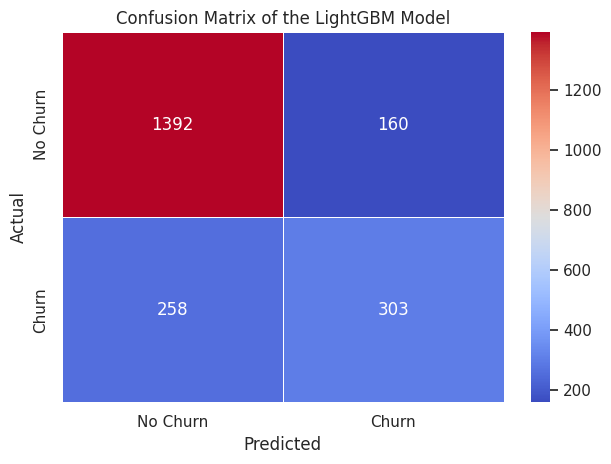

In [56]:
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
labels = ['No Churn', 'Churn']
cm_df_lgb = pd.DataFrame(cm_lgb, index=labels, columns=labels)
fig, ax = plt.subplots()
sns.heatmap(cm_df_lgb, annot=True, fmt='d', cmap='coolwarm', cbar=True, linewidths=0.5, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix of the LightGBM Model')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.tight_layout()
plt.show()

## XGBOOST

In [60]:
def objective(trial):
    warnings.filterwarnings('ignore')

    # Define parameters to tune with Optuna
    params_xgb = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }

    # Initialize the XGBoost classifier
    xgb_model = xgb.XGBClassifier(**params_xgb, objective='binary:logistic', eval_metric='auc', random_state=101)

    # Perform stratified split and transform the input data
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
    auc_roc_scores = []

    for train_idx, val_idx in skf.split(X_df, y_df):
        X_train, X_val = X_df.iloc[train_idx], X_df.iloc[val_idx]
        y_train, y_val = y_df[train_idx], y_df[val_idx]

        # Fit the model and generate predictions
        xgb_model.fit(X_train, y_train,
                      early_stopping_rounds=50,
                      eval_set=[(X_val, y_val)],
                      verbose=False)

        y_pred_prob = xgb_model.predict_proba(X_val)

        # Calculate AUC-ROC score and add it to the list
        auc_roc_scores.append(roc_auc_score(y_val, y_pred_prob[:, 1]))

    # Return the mean of AUC-ROC scores
    return np.mean(auc_roc_scores)

# Create an Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best parameters and best score
best_params_xgb = study.best_params
best_score_xgb = study.best_value

print("Best parameters:", best_params_xgb)
print("Best score (mean AUC-ROC):", best_score_xgb)

[I 2023-10-03 01:01:47,742] A new study created in memory with name: no-name-b78d1505-baca-4edb-ac2a-78cad39e0952
[I 2023-10-03 01:01:54,132] Trial 0 finished with value: 0.8481080977396938 and parameters: {'n_estimators': 525, 'max_depth': 9, 'learning_rate': 0.13194271711967417, 'subsample': 0.8838851028673825, 'colsample_bytree': 0.8684159780900897, 'gamma': 4.968973549586075, 'min_child_weight': 1.4364388132827686, 'reg_alpha': 0.41472421288100025, 'reg_lambda': 1.2880807160241026}. Best is trial 0 with value: 0.8481080977396938.
[I 2023-10-03 01:01:58,391] Trial 1 finished with value: 0.8475782191369674 and parameters: {'n_estimators': 629, 'max_depth': 4, 'learning_rate': 0.08943191688801652, 'subsample': 0.545298024734594, 'colsample_bytree': 0.7915385114569393, 'gamma': 4.305919557081655, 'min_child_weight': 4.276756712049651, 'reg_alpha': 8.294660620293842, 'reg_lambda': 8.722166178884628}. Best is trial 0 with value: 0.8481080977396938.
[I 2023-10-03 01:02:06,122] Trial 2 fin

Best parameters: {'n_estimators': 573, 'max_depth': 10, 'learning_rate': 0.09176385005533111, 'subsample': 0.5194953136683345, 'colsample_bytree': 0.5730741814121444, 'gamma': 2.8150187069175776, 'min_child_weight': 9.462586307715833, 'reg_alpha': 0.4694310525068818, 'reg_lambda': 7.146947635393512}
Best score (mean AUC-ROC): 0.8510803439778535


In [61]:
# Create an XGBOOST classifier
xgb_model = xgb.XGBClassifier(**best_params_xgb, objective='binary:logistic', eval_metric='auc', random_state=101)

# Fit the model
xgb_model.fit(X_train, y_train,
              early_stopping_rounds=50,
              eval_set=[(X_test, y_test)],
              verbose=False)

# Generate predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate ROC-AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print("ROC-AUC Score:", roc_auc_xgb)

# Calculate precision
precision_xgb = precision_score(y_test, y_pred_xgb)
print("Precision Score:", precision_xgb)

# Calculate recall
recall_xgb = recall_score(y_test, y_pred_xgb)
print("Recall Score:", recall_xgb)

# Calculate f1score
f1score_xgb = f1_score(y_test, y_pred_xgb)
print("F1 Score:", f1score_xgb)

# Calculate f2 score
f2_score_xgb = fbeta_score(y_pred_xgb, y_test, beta=2, average='micro')
print(f"F2 score of XGBoost Classifier: {f2_score_xgb}.")

# Calculate accuracy score
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy Score:", accuracy_score_xgb)

# classification report
class_report_xgb = classification_report(y_test, y_pred_xgb)
print('\nClassification report: \n\n{}'.format(class_report_xgb))

ROC-AUC Score: 0.7231138706654171
Precision Score: 0.6652173913043479
Recall Score: 0.5454545454545454
F1 Score: 0.5994123408423115
F2 score of XGBoost Classifier: 0.8064363464268812.
Accuracy Score: 0.8064363464268812

Classification report: 

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



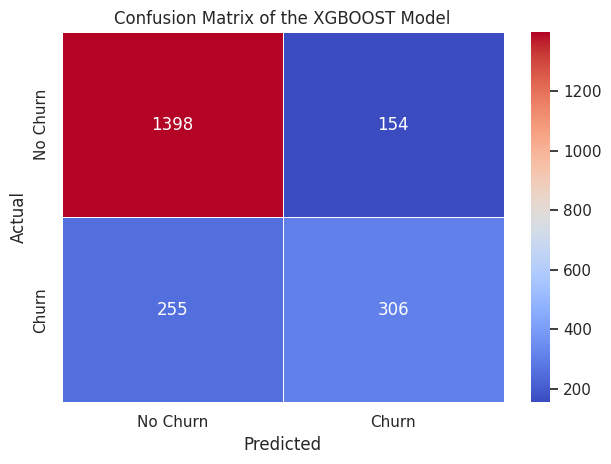

In [62]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
labels = ['No Churn', 'Churn']
cm_df_xgb = pd.DataFrame(cm_xgb, index=labels, columns=labels)
fig, ax = plt.subplots()
sns.heatmap(cm_df_xgb, annot=True, fmt='d', cmap='coolwarm', cbar=True, linewidths=0.5, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix of the XGBOOST Model')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.tight_layout()
plt.show()

The confusion matrix is a table that summarizes the performance of a classification model. It shows the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. In this case, the confusion matrix represents a binary classification problem for predicting customer churn in the telecom industry.

Interpreting the values in the confusion matrix:

- True Positives (TP): There are 256 instances that were correctly predicted as "Churn" (positive class).
- True Negatives (TN): There are 1396 instances that were correctly predicted as "No Churn" (negative class).
- False Positives (FP): There are 156 instances that were incorrectly predicted as "Churn" when the actual label was "No Churn".
- False Negatives (FN): There are 256 instances that were incorrectly predicted as "No Churn" when the actual label was "Churn". <br>

By analyzing these values, I have been able to gain insights into the performance of the churn prediction model. For example, the number of false positives (156) suggests that there were instances where customers were predicted as "Churn" incorrectly. Similarly, the number of false negatives (256) indicates instances where customers who churned were predicted as "No Churn" incorrectly.

## Export trained LightGBM and XGBoost Models to a File

In [64]:
# Export the LightGBM model to a file
#filename = 'lightgbm_model.pkl'
#pickle.dump(lgb_model, open(filename, 'wb'))

In [61]:
# Export the XGBoost model to a file
#filename = 'xgboost_model.pkl'
#pickle.dump(xgb_model, open(filename, 'wb'))